## Q2. IRIS FLOWER CLASSIFICATION

**-> The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.**

**-> Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.**

In [2]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
m.style.use("dark_background")

### Data Overview:-

In [3]:
iris=p.read_csv("Iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Analysing the Data:-

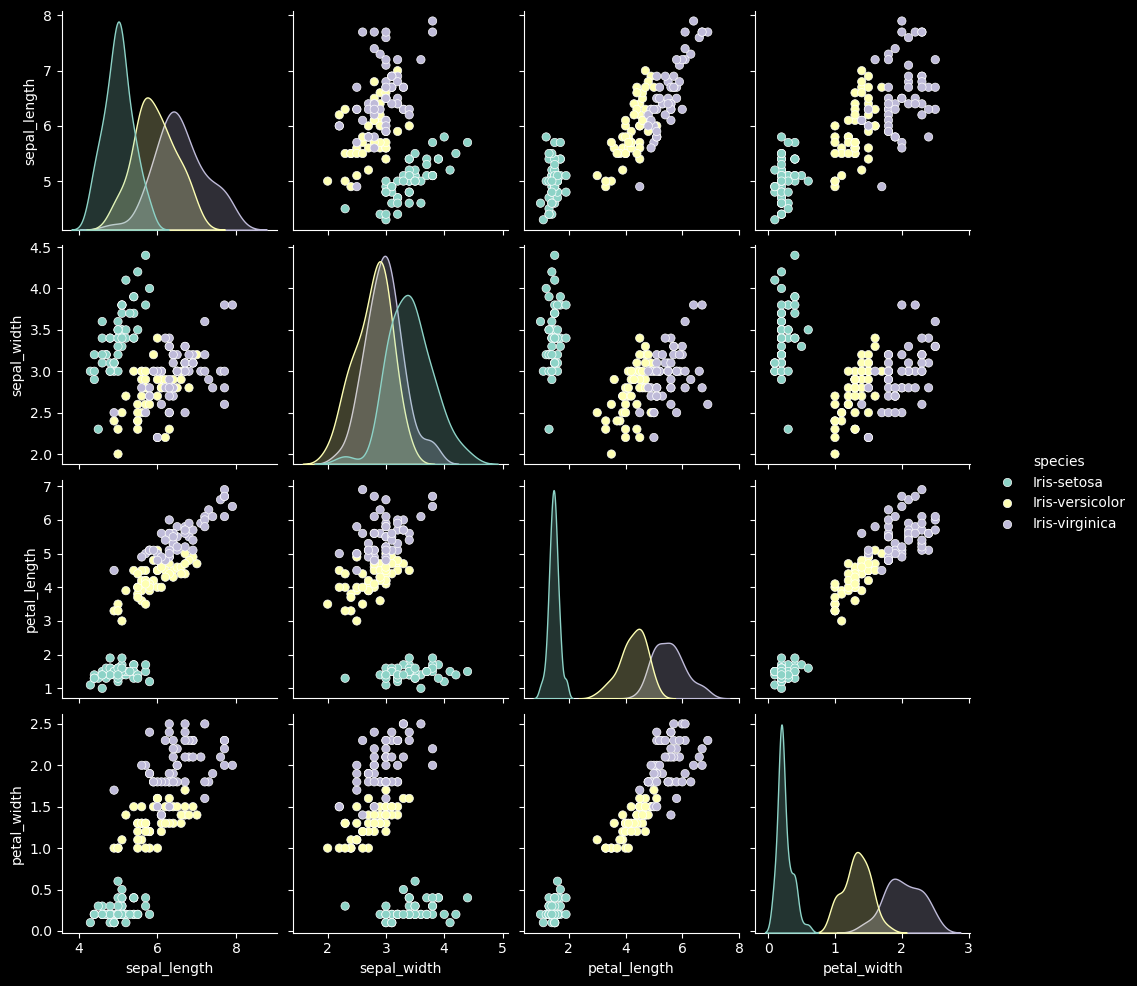

In [4]:
s.pairplot(iris,hue='species')
m.show()

###### here we see the relation or clusters of different species between two input columns

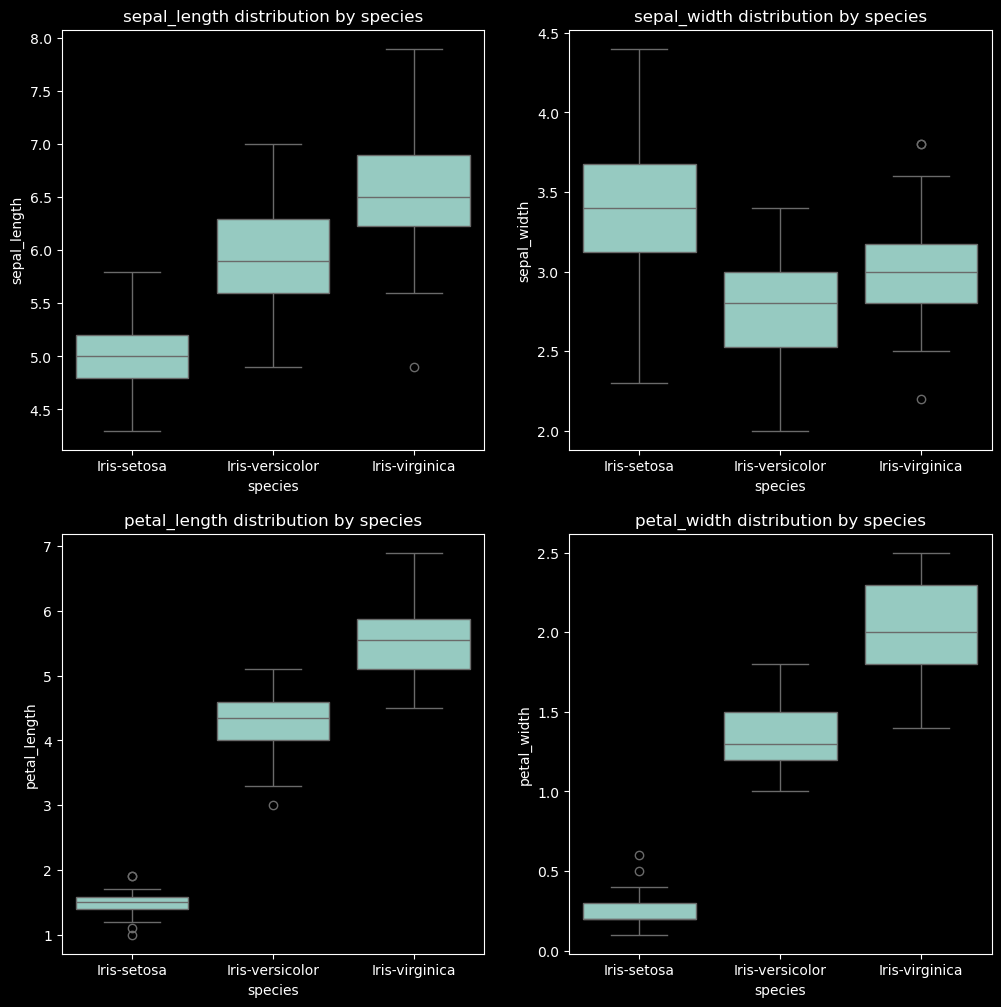

In [8]:
def box_plot(y):
    s.boxplot(data=iris,x='species',y=y)
m.figure(figsize=(12,12))
for i,j in enumerate(iris.columns[:4]):
    m.subplot(2,2,i+1)
    box_plot(j)
    m.title(f"{j} distribution by species")
m.show()

###### here we can conclude that 
###### The sepal length of versicolor and verginica is more compared to setosa species
###### The sepal width of setosa is more compared to versicolor and verginica species
###### The petal length  and petal width of versicolor and verginica is more compared to setosa species

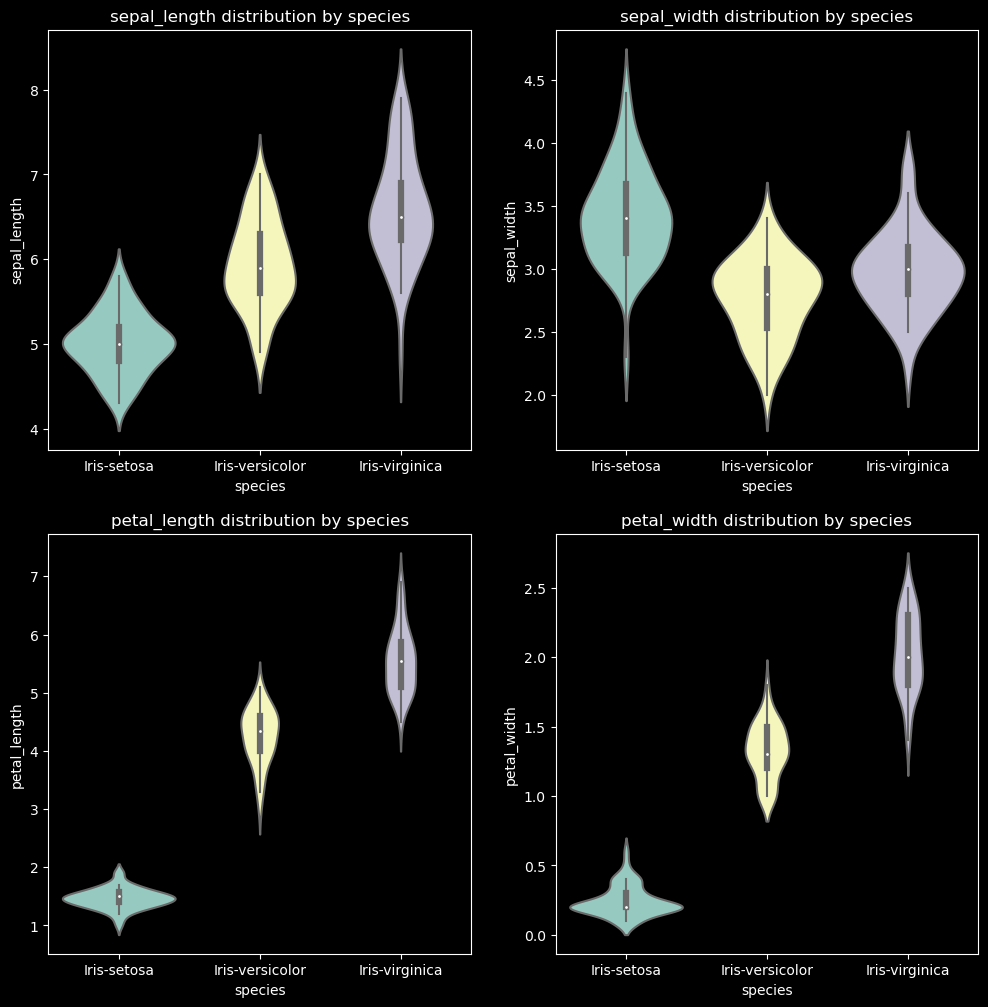

In [11]:
def violin_plot(y):
    s.violinplot(data=iris,x='species',y=y)
m.figure(figsize=(12,12))
for i,j in enumerate(iris.columns[:-1]):
    m.subplot(2,2,i+1)
    violin_plot(j)
    m.title(f"{j} distribution by species")
m.show()

###### Similar information as that of boxplot

### Data Cleaning:-

In [13]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###### No need to clean the data as there are no null values

### Train & Test Data:-

In [15]:
X=iris.drop('species',axis=1)
y=iris['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
from sklearn.svm import SVC

In [20]:
svc=SVC()
svc.fit(X_train,y_train)

In [ ]:
prediction=svc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction)

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [30]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        14\nIris-versicolor       1.00      0.94      0.97        18\n Iris-virginica       0.93      1.00      0.96        13\n\n       accuracy                           0.98        45\n      macro avg       0.98      0.98      0.98        45\n   weighted avg       0.98      0.98      0.98        45\n'

### Model Accuracy:-

In [26]:
from sklearn.metrics import accuracy_score
print(f'Model Accuracy = {accuracy_score(y_test,prediction)*100:.2f} %')

Model Accuracy = 97.78 %
